## 生成模拟数据

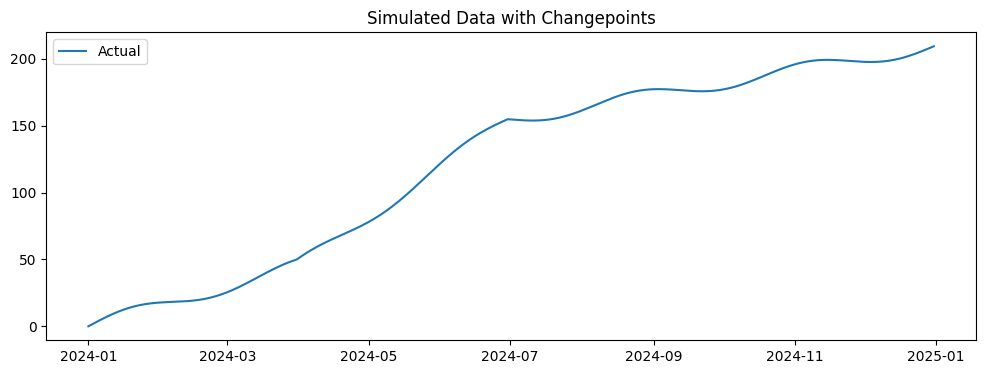

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# 生成日期范围
dates = pd.date_range(start='2024-01-01', end='2024-12-31')
n_days = len(dates)

# 模拟趋势突变
np.random.seed(42)
trend = np.concatenate([
    0.5 * np.arange(90),                     # 1月-3月：斜率0.5
    0.5 * 90 + 1.2 * np.arange(91),          # 4月-6月：斜率1.2
    0.5 * 90 + 1.2 * 91 + 0.3 * np.arange(n_days-90-91) # 7月-12月：斜率0.3
])

# 添加季节性噪声
y = trend + 5 * np.sin(np.linspace(0, 10*np.pi, n_days))
df = pd.DataFrame({'ds': dates, 'y': y})

# 可视化原始数据
plt.figure(figsize=(12, 4))
plt.plot(df['ds'], df['y'], label='Actual')
plt.title("Simulated Data with Changepoints")
plt.legend()
plt.show()

## 训练prophet模型

In [2]:
# 初始化模型（显式启用周季节性）
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    changepoint_prior_scale=0.5,  # 提高突变点灵敏度
    changepoint_range=0.9         # 在前90%数据中检测突变点
)

# 拟合数据
model.fit(df)

# 创建未来30天的预测
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

20:26:41 - cmdstanpy - INFO - Chain [1] start processing
20:26:42 - cmdstanpy - INFO - Chain [1] done processing


## 可视化突变点与预测

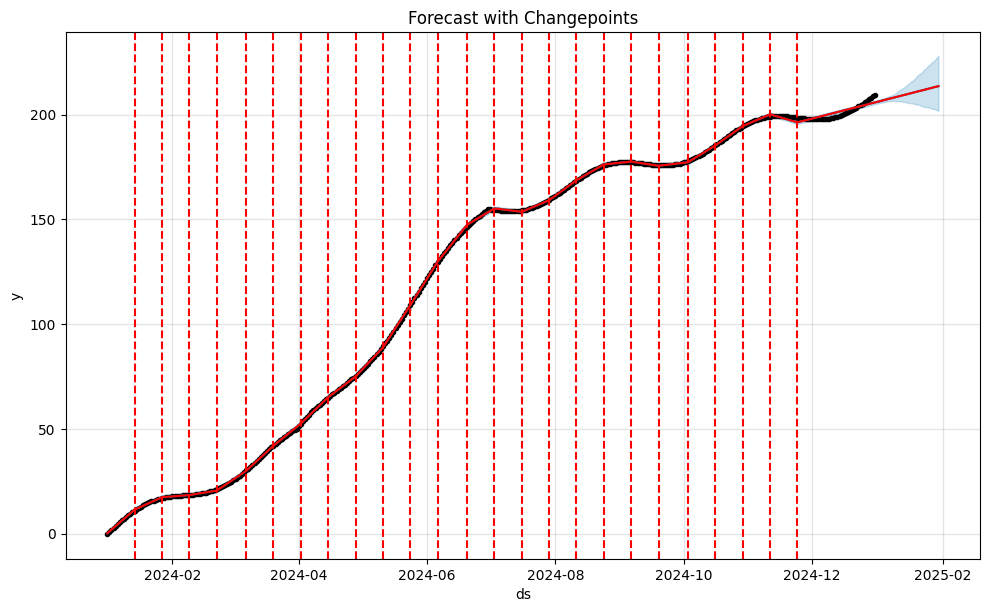

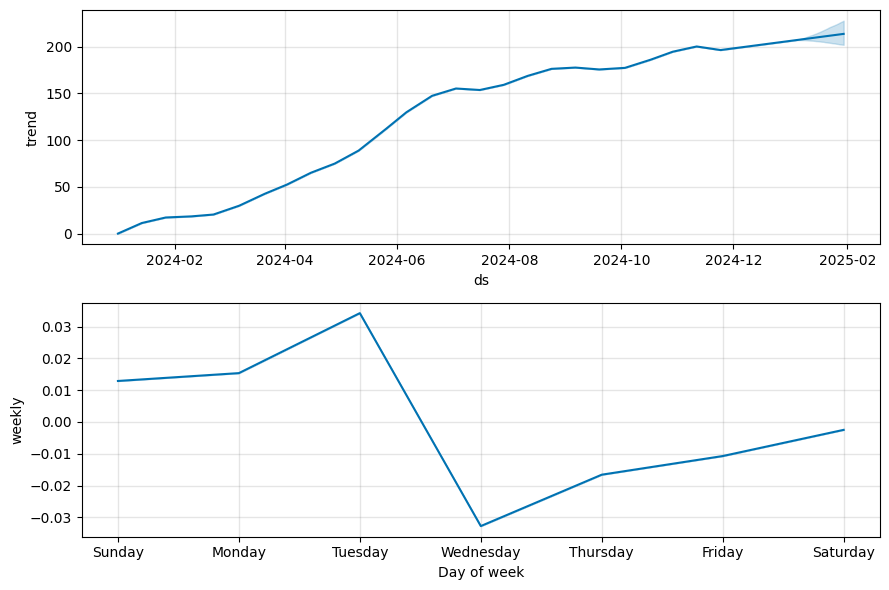

In [3]:
# 绘制预测结果
fig1 = model.plot(forecast)
plt.title("Forecast with Changepoints")

# 标记突变点
from prophet.plot import add_changepoints_to_plot
add_changepoints_to_plot(fig1.gca(), model, forecast)

# 分解趋势和季节性
fig2 = model.plot_components(forecast)